# Esercizio Introduttivo

In questo esercizio introduttivo dovrai sviluppare un semplice metodo di regressione lineare con scipy. Puoi trovare tutte le informazioni su come fare la regression con scipy all'url: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Carica il file .csv fornito con i dati delle auto usate

2) Utilizza una regressione lineare per stimare i prezzi delle auto in base all'anno, ai chilometri percorsi o alla potenza del motore. Puoi effettuare una semplice regressione 1D da ciascuno dei parametri in modo indipendente (facoltativo: puoi anche provare una regressione 2D o 3D combinando più parametri)

3) Per prima cosa esegui la stima utilizzando la funzione linregress di scipy (o in alternativa puoi utilizzare la classe sklearn.linear_model.LinearRegression). NB: controlla la documentazione dei due metodi!! In particolare, fai attenzione al numero di output (in caso usa "_" per evitare un output specifico nel return della funzione).

4) Dai un'occhiata al coefficiente di correlazione per vedere quale delle 3 caratteristiche funziona meglio

5) (facoltativo) Implementa a mano l'algoritmo dei minimi quadrati: dovresti ottenere esattamente la stessa soluzione di linregress!

6) Traccia i dati e le rette che rappresentano l'output degli algoritmi linregress e minimi quadrati

In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model as lm
#aggiunte da me
from scipy.stats import linregress

In [2]:
# Carica i file dati con le informazioni sulle auto usate (prova ad aprirlo con un text editor per vedere il contenuto!)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# carico i dati
dataset = list(lines)
#print(dataset)
#print(len(dataset))
arrayset = np.array(dataset)
#print(len(ar))
print(type(arrayset)) #ovviamnete mi stampa numpy.ndarray!!!!
print(type(arrayset[1,1])) #voglio vedere che tipo di dati contiene l'array, a mia sorpresa sono stringhe e non float
print() #spazio
print(arrayset)

<class 'numpy.ndarray'>
<class 'numpy.str_'>

[['km' 'year' 'powerPS' 'avgPrice']
 ['125000' '2001' '40' '1371.11']
 ['150000' '2001' '40' '1298.70']
 ...
 ['20000' '2015' '260' '49492.38']
 ['10000' '2015' '300' '38542.69']
 ['20000' '2015' '300' '39683.32']]


Usa la regressione lineare per stimare i prezzi delle auto in base all'anno, ai chilometri o alla potenza del motore. È possibile effettuare una semplice regressione 1D da ciascuno dei parametri in modo indipendente


In [3]:
# Regressione lineare con linregress (stima il prezzo dall'anno)
# l'arrayset è del tipo [n,4]
# ora creo 4 array [1,n] per linregress, mi ricordo di saltare la prima riga che è di tipo string
km = np.array(arrayset[1:,0], dtype=float) #dtype=float converte il dato dell'array che è di tipo string
year = np.array(arrayset[1:,1], dtype=float)
pw = np.array(arrayset[1:,2], dtype=float)
price = np.array(arrayset[1:,-1], dtype=float)
#print(km)
#print(year)
#print(pw)
lryear = linregress(year, price)

In [4]:
# (Opzionale) regressione lineare con linear_model.LinearRegression() (stima il prezzo dall'anno)
# Ricorda che in Python una  matrice mx1 è diversa da un array 1D -> usa reshape

# your code.....

In [5]:
# (Opzionale) implementa la regressione lineare coi minimi quadrati "a mano" senza usare le funzioni di Python
# Dovresti ottenere lo stesso risultato di linregress !

# your code.....

In [6]:
# Regressione lineare con linregress (stima il prezzo dalla potenza)
lrpw = linregress(pw, price)

In [7]:
# regressione lineare con linregress (stima il prezzo dai chilometri)
lrkm = linregress(km, price)

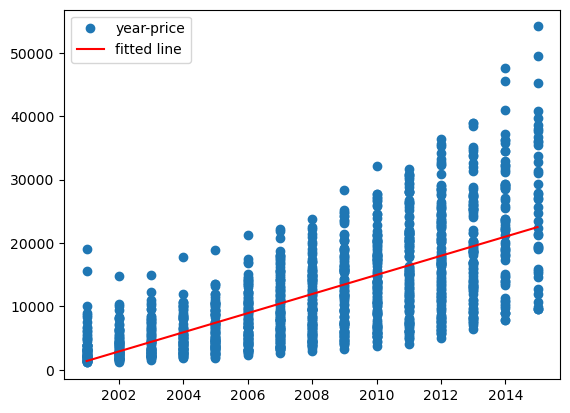

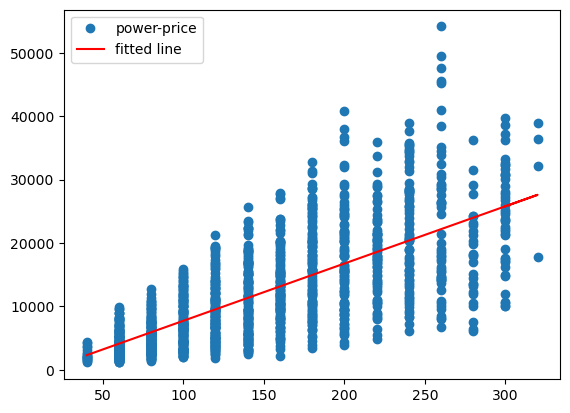

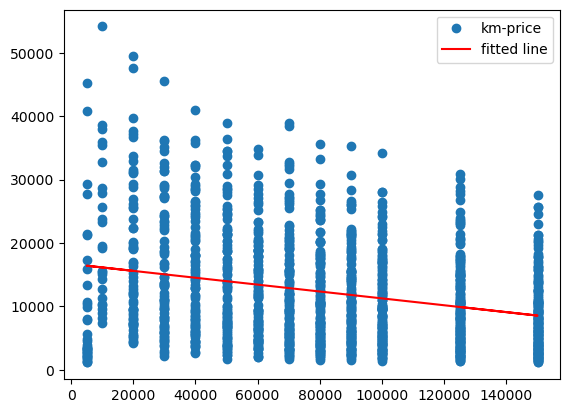

In [8]:
# Plotta i dati e le linee che rappresentano l'output degli algoritmi linregress e dei minimi quadrati
# slope : float : pendenza della retta di regressione
# intercept : float : intercetta della retta di regressione

# plot year-price
plt.plot(year, price, 'o', label='year-price')
plt.plot(year, lryear.intercept + lryear.slope*year, 'r', label='fitted line') #i
plt.legend()
plt.show()

# plot power-price
plt.plot(pw, price, 'o', label='power-price')
plt.plot(pw, lrpw.intercept + lrpw.slope*pw, 'r', label='fitted line')
plt.legend()
plt.show()

# plot km-price
plt.plot(km, price, 'o', label='km-price')
plt.plot(km, lrkm.intercept + lrkm.slope*km, 'r', label='fitted line')
plt.legend()
plt.show()

In [9]:
# Dai un'occhiata ai coefficienti di correlazione per vedere quale delle 3 caratteristiche funziona meglio
# rvalue : float : coefficient di correlazione (vedi box, ±1 : corr. totale, 0 no correlazione)
print("Coefficiente di correlazione year-price:", lryear.rvalue)
print("Coefficiente di correlazione power-price:", lrpw.rvalue)
print("Coefficiente di correlazione km-price:", lrkm.rvalue)

print()

#funzione che determina il miglior coefficiente di correlazione
#confronto massimo tra 3 coefficienti, se ne ho 2 metto che uno vale 0
def ccc(a, b, c):
    x = a
    if ((1 - abs(x)) > (1 - abs(b))):
        x = b
    if ((1 - abs(x)) > (1 - abs(c))):
        x = c
    return x

print("il miglio coefficiente di correlazione è:", ccc(lryear.rvalue, lrpw.rvalue, lrkm.rvalue))

Coefficiente di correlazione year-price: 0.6767043169095447
Coefficiente di correlazione power-price: 0.708550031526397
Coefficiente di correlazione km-price: -0.2572867429988497

il miglio coefficiente di correlazione è: 0.708550031526397


In [10]:
# (Opzionale) regressione lineare 2D con linear model (ad es. stima il prezzo da anno e potenza)


# your code......
